In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000921547"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000921547
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,HERITAGE OAKS BANCORP
Ticker,HEOP


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,23.0,5.536087e+00,9.189358e-01,3.85,4.79,5.76,6.055000e+00,7.38
interest income,49.0,1.249069e+07,3.114753e+06,6288000.00,11073000.00,12072000.00,1.359900e+07,18920000.00
net income,49.0,1.495102e+06,2.898461e+06,-10903000.00,954000.00,1675000.00,3.429000e+06,6428000.00
net interest income,46.0,9.479739e+06,4.291852e+06,-491000.00,6658750.00,8535500.00,1.202900e+07,17963000.00
provision for loan losses,49.0,1.615429e+06,3.060266e+06,-1000000.00,0.00,180000.00,2.299000e+06,16100000.00


# Plots

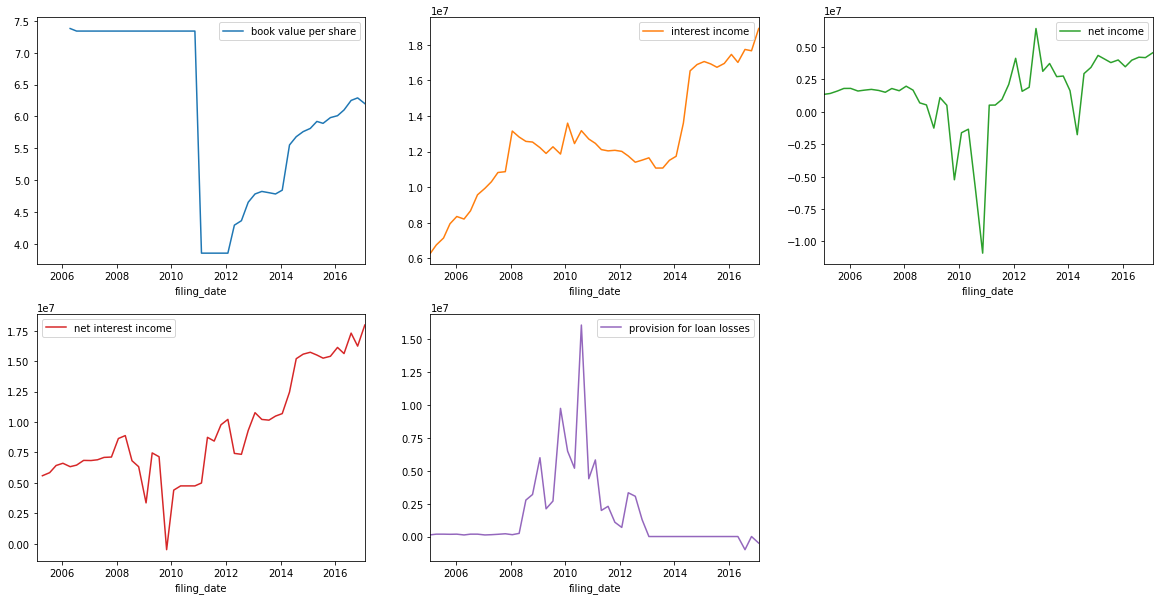

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                          
0000921547 book value per share   2004Q4 to 2005Q4: 5 periods  missing   
           book value per share  2006Q3 to 2010Q3: 17 periods  missing   
           book value per share   2011Q1 to 2011Q4: 4 periods  missing   
           net interest income                         2004Q4  missing   
           net interest income    2010Q2 to 2010Q3: 2 periods  missing   
           total revenue                                 None    empty   

                                            message  
cik        item                                      
0000921547 book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           net interest income       Missing period  
           net interest income       Missing period  
           total revenue         No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()